In [1]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
stocks = 'AMZN FB IBM MMM'
stocks = stocks.split()
data = yf.download(stocks,'2014-03-16')['Adj Close'] #download stock close and put in one frame to make working with the set easier


[*********************100%***********************]  4 of 4 downloaded


In [2]:
data.head(3) #check first few rows of frame

,AMZN,FB,IBM,MMM
Date,,,,
2014-03-17,375.040009,68.739998,152.257065,116.596603
2014-03-18,378.769989,69.190002,153.076477,117.010910
2014-03-19,373.230011,68.239998,151.355682,115.679825


In [3]:
data = data.asfreq('BM', method = 'ffill') #resample and select the close value at business month end
#correlation plots for each stock
data.head(3)

,AMZN,FB,IBM,MMM
Date,,,,
2014-03-31,336.369995,60.240002,157.730820,119.584930
2014-04-30,304.130005,59.779999,160.992111,122.608490
2014-05-30,312.549988,63.299999,151.948441,126.429359


In [4]:
data.isna().sum()#check for nan values

AMZN    0
FB      0
IBM     0
MMM     0
dtype: int64

In [5]:
data.describe(include='all')

,AMZN,FB,IBM,MMM
count,60.000000,60.000000,60.000000,60.000000
mean,878.080831,124.224167,139.446339,169.284546
std,499.709856,40.078464,12.878445,33.058179
min,304.130005,59.779999,108.397858,119.584930
25%,432.875000,84.882498,133.926083,142.987423
50%,754.690002,121.375000,138.744293,164.357307
75%,1171.289978,162.202499,147.208057,195.945209
max,2012.709961,194.320007,165.001785,242.351059


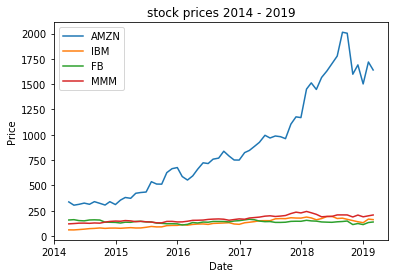

In [6]:
plt.plot(data)
plt.xlabel('Date'), plt.ylabel('Price'), plt.title('stock prices 2014 - 2019')
plt.legend(['AMZN', 'IBM', 'FB', 'MMM'], loc = 2)

Text(0.5, 1.0, 'Autocorrelation Plot')

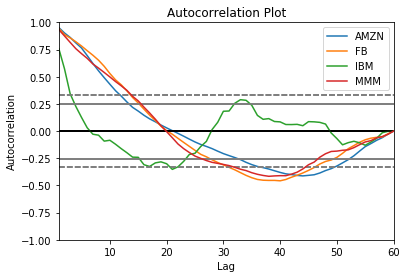

In [7]:
#autocorrelation plots for each stock
autocorrelation_plot(data['AMZN'], label = 'AMZN'),autocorrelation_plot(data['FB'], label='FB'),autocorrelation_plot(data['IBM'], label='IBM'),autocorrelation_plot(data['MMM'], label ='MMM')
plt.title('Autocorrelation Plot')

In [8]:
returns = 100*(1-(data.shift(-1)/data))#calculate the monthly return for each stock using shift trick
returns=returns.fillna(0) #fill Nan value as a result of shift
returns.head(5)#peek into frame and check first few rows


,AMZN,FB,IBM,MMM
Date,,,,
2014-03-31,9.584681,0.763617,-2.067631,-2.528379
2014-04-30,-2.768547,-5.888257,5.617462,-3.116317
2014-05-30,-3.912978,-6.303321,1.676044,-0.484005
2014-06-30,3.630152,-7.965524,-5.737279,1.640610
2014-07-31,-8.322956,-2.986921,-0.922029,-2.816801


In [9]:
returns.isna().sum()#check for nan values

AMZN    0
FB      0
IBM     0
MMM     0
dtype: int64

In [10]:
returns.describe()

,AMZN,FB,IBM,MMM
count,60.000000,60.000000,60.000000,60.000000
mean,-3.022614,-1.866663,0.016835,-1.034681
std,8.524184,6.674438,6.354648,4.785557
min,-24.063897,-27.156921,-18.254593,-10.890900
25%,-7.697605,-5.801524,-3.770702,-4.331362
50%,-2.693352,-1.655909,0.293092,-1.525274
75%,2.259219,2.739769,3.279550,1.739081
max,20.219171,11.187734,23.662467,11.447693


<Figure size 432x288 with 0 Axes>

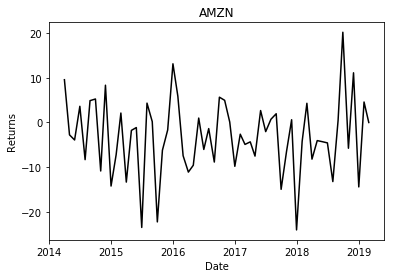

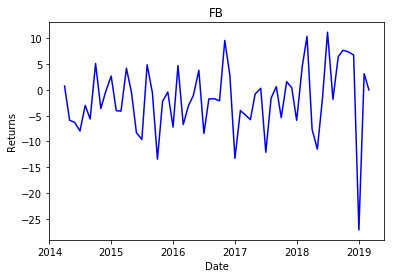

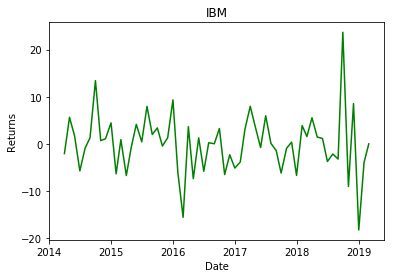

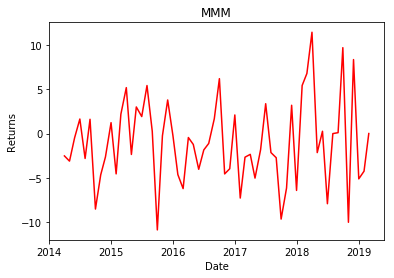

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(returns['AMZN'], color = 'black')
plt.title('AMZN')
plt.xlabel('Date'), plt.ylabel('Returns')
plt.figure()
plt.plot(returns['FB'], color = 'blue')
plt.title('FB')
plt.xlabel('Date'), plt.ylabel('Returns')
plt.figure()
plt.plot(returns['IBM'], color = 'green')
plt.title('IBM')
plt.xlabel('Date'), plt.ylabel('Returns')
plt.figure()
plt.plot(returns['MMM'], color = 'red')
plt.title('MMM')
plt.xlabel('Date'), plt.ylabel('Returns')
plt.figure()

<Figure size 432x288 with 0 Axes>

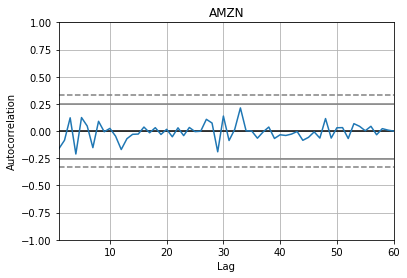

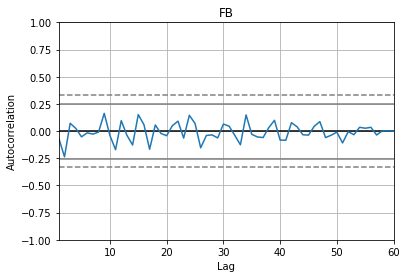

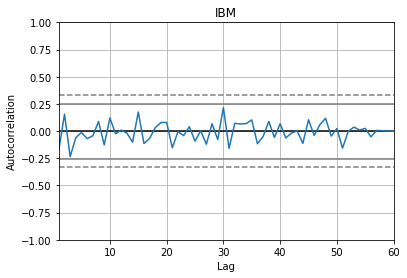

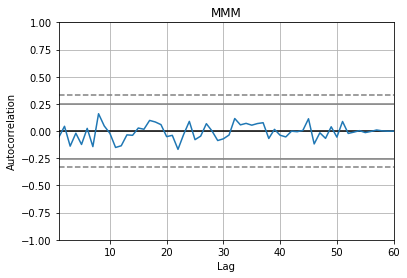

<Figure size 432x288 with 0 Axes>

In [12]:
#autocorrelation plots for stock returns
autocorrelation_plot(returns['AMZN'])
plt.title('AMZN')
plt.figure()
autocorrelation_plot(returns['FB'])
plt.title('FB')
plt.figure()
autocorrelation_plot(returns['IBM'])
plt.title('IBM')
plt.figure()
autocorrelation_plot(returns['MMM'])
plt.title('MMM')
plt.figure()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115a89b38>,
      dtype=object)

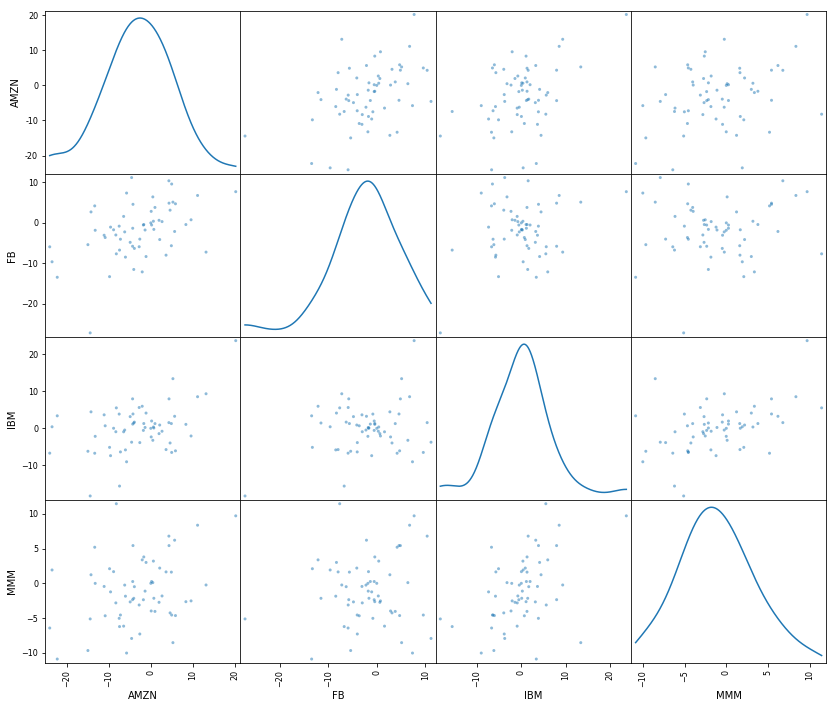

In [13]:
scatter_matrix(returns, figsize=(14,12), alpha =0.5, diagonal = 'kde')#scatter matrix

In [23]:
data.corr() #correlation table

,AMZN,FB,IBM,MMM
AMZN,1.000000,0.876352,-0.104774,0.845054
FB,0.876352,1.000000,-0.036121,0.927775
IBM,-0.104774,-0.036121,1.000000,0.049744
MMM,0.845054,0.927775,0.049744,1.000000


In [24]:
returns.corr() #correlation table

,AMZN,FB,IBM,MMM
AMZN,1.000000,0.452161,0.430772,0.318332
FB,0.452161,1.000000,0.238534,0.097886
IBM,0.430772,0.238534,1.000000,0.454022
MMM,0.318332,0.097886,0.454022,1.000000


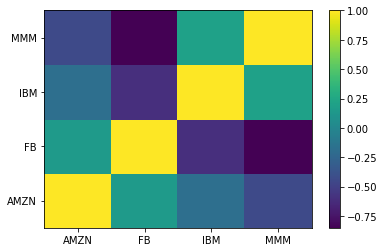

In [25]:
R = corrcoef(returns.corr())
pcolor(R)
colorbar()
yticks(arange(0.5,4),stocks)
xticks(arange(0.5,4),stocks)
show()